In [7]:
#import the tasks we need to complete the code
#I looked stuff up on the internet
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.table as tbl
#now we have to import certain functions from packages and other codes
from astropy.constants import G
from ReadFile import Read
#from CenterOfMass import CenterOfMass

In [47]:
# my computer was REFUSING to acknowledge the fact that the function CenterOfMass exists. It was in the same folder as all 
#of my homeworks but it just wouldn't do it and I had no idea what to do so here I am copying the whole function
#into this code in order to make things work.
#I just needed more time to figure out what was going on.
class CenterOfMass:
# Class to define COM position and velocity properties of a given galaxy 
# and simulation snapshot
    
    
    def __init__(self, filename, ptype):
    # Initialize the instance of this Class with the following properties:
    
        # read data in the given file using Read
        self.time, self.total, self.data = Read(filename)                                                                                             

        #create an array to store indexes of particles of desired Ptype                                
        self.index = np.where(self.data['type'] == ptype)

        # store the mass, positions, velocities of only the particles of the given type
        # the following only gives the example of storing the mass
        self.m = self.data['m'][self.index]
        # write your own code to complete this for positions and velocities
        #the positions and velocities are defined by the index as x,y,z and vx,vy,vz
        self.m = self.data['m'][self.index]
        self.x = self.data['x'][self.index]
        self.y = self.data['y'][self.index]
        self.z = self.data['z'][self.index]
        self.vx = self.data['vx'][self.index]
        self.vy = self.data['vy'][self.index]
        self.vz = self.data['vz'][self.index]


    def COMdefine(self,a,b,c,m):
    # Function to compute the center of mass position or velocity generically
    # input: array (a,b,c) of positions or velocities and the mass
    # returns: 3 floats  (the center of mass coordinates)
    
    #define strings for each component
        xstr = []
        ystr = []
        zstr = []
        msum = np.sum(m)
    
            #the component for each vector is given as the sum of x*m / the sum of m
        #so we have to calculate the sums for all of these components
        #I'm not sure how to do this other than in a for loop
        for i in range (len(a)):
            #for the x component
            xstr.append(np.sum(a[i]*m[i]))
            #this will change the value of xstr based on the values imported from the data
            #now we repeat this for y and z
            ystr.append(np.sum(b[i]*m[i]))
            zstr.append(np.sum(c[i]*m[i]))
        xcom = np.sum(xstr)
        #this will sum all of the calculations made by the previous line
        ycom = np.sum(ystr)
        zcom = np.sum(zstr)
        #now we have the numerator value for the components from the equation listed before    
        # write your own code to compute the generic COM using Eq. 1 in the homework instructions
        # xcomponent Center of mass
        Acom = xcom/msum
        # ycomponent Center of mass
        Bcom = ycom/msum
        # zcomponent Center of mass
        Ccom = zcom/msum
        
        return Acom, Bcom, Ccom
    
    
    def COM_P(self, delta):
    # Function to specifically return the center of mass position and velocity                                         
    # input:                                                                                                           
    #        particle type (1,2,3)                                                                                     
    #        delta (tolerance)                                                                                         
    # returns: One vector, with rows indicating:                                                                                                                                                                            
    #       3D coordinates of the center of mass position (kpc)                                                             

        # Center of Mass Position                                                                                      
        ###########################                                                                                    

        # Try a first guess at the COM position by calling COMdefine                                                   
        XCOM, YCOM, ZCOM = self.COMdefine(self.x, self.y, self.z, self.m)
        # compute the magnitude of the COM position vector.
        # write your own code below
        RCOM = np.sqrt(XCOM**2+YCOM**2+ZCOM**2)


        # iterative process to determine the center of mass                                                            

        # change reference frame to COM frame                                                                          
        # compute the difference between particle coordinates                                                          
        # and the first guess at COM position
        # write your own code below
        xNew = (self.x - XCOM)
        yNew = (self.y - YCOM)
        zNew = (self.z - ZCOM)
        RNEW = np.sqrt(xNew**2+yNew**2+zNew**2)

        # find the max 3D distance of all particles from the guessed COM                                               
        # will re-start at half that radius (reduced radius)                                                           
        RMAX = max(RNEW)/2.0
        
        # pick an initial value for the change in COM position                                                      
        # between the first guess above and the new one computed from half that volume
        # it should be larger than the input tolerance (delta) initially
        CHANGE = 1000.0

        # start iterative process to determine center of mass position                                                 
        # delta is the tolerance for the difference in the old COM and the new one.    
        
        while (CHANGE > delta):
            # select all particles within the reduced radius (starting from original x,y,z, m)
            # write your own code below (hints, use np.where)
            index2 = np.where(RNEW <= RMAX)
            x2 = self.x[index2]
            y2 = self.y[index2]
            z2 = self.z[index2]
            m2 = self.m[index2]

            # Refined COM position:                                                                                    
            # compute the center of mass position using                                                                
            # the particles in the reduced radius
            # write your own code below
            XCOM2, YCOM2, ZCOM2 = self.COMdefine(x2,y2,z2,m2)
            # compute the new 3D COM position
            # write your own code below
            RCOM2 = np.sqrt(XCOM2**2+YCOM2**2+ZCOM2**2)

            # determine the difference between the previous center of mass position                                    
            # and the new one.                                                                                         
            CHANGE = np.abs(RCOM - RCOM2)
            # uncomment the following line if you wnat to check this                                                                                               
       # print ("CHANGE = ", CHANGE)                                                                                     

            # Before loop continues, reset : RMAX, particle separations and COM                                        

            # reduce the volume by a factor of 2 again                                                                 
            RMAX = RMAX/2.0
            # check this.                                                                                              
            #print ("maxR", maxR)                                                                                 

            # Change the frame of reference to the newly computed COM.                                                 
            # subtract the new COM
            # write your own code below
            xNew = (self.x-XCOM2)
            yNew = (self.y-YCOM2)
            zNew = (self.z-ZCOM2)
            RNEW = np.sqrt(xNew**2+yNew**2+zNew**2)

            # set the center of mass positions to the refined values                                                   
            XCOM = XCOM2
            YCOM = YCOM2
            ZCOM = ZCOM2
            RCOM = RCOM2

            # create a vector to store the COM position                                                                                                                                                       
            COMP = [XCOM, YCOM, ZCOM]

        # set the correct units usint astropy and round all values
        # and then return the COM positon vector
        # write your own code below
        return np.round(COMP*u.kpc,2)
    

    def COM_V(self, COMX,COMY,COMZ):
        # Center of Mass velocity
        # input: X, Y, Z positions of the COM
        # returns 3D Vector of COM Velocities
        
        # the max distance from the center that we will use to determine the center of mass velocity                   
        RVMAX = 15.0*u.kpc

        # determine the position of all particles relative to the center of mass position
        # write your own code below
        xV = self.x*u.kpc - COMX
        yV = self.y*u.kpc - COMY
        zV = self.z*u.kpc - COMZ
        RV = np.sqrt(xV**2+yV**2+zV**2)
        
        # determine the index for those particles within the max radius
        # write your own code below
        indexV = np.where(RV <= RVMAX)

        # determine the velocity and mass of those particles within the mas radius
        # write your own code below
        vxnew = self.vx[indexV]
        vynew = self.vy[indexV]
        vznew = self.vz[indexV]
        mnew =  self.m[indexV]
        
        # compute the center of mass velocity using those particles
        # write your own code below
        VXCOM, VYCOM, VZCOM = self.COMdefine(vxnew,vynew,vznew,mnew)

        # create a vector to store the COM velocity
        # set the correct units usint astropy
        # we are rounding all of the values to 2 decimal places
        VXCOMr = np.around(VXCOM,2)
        VYCOMr = np.around(VYCOM,2)
        VZCOMr = np.around(VZCOM,2)
        # write your own code below
        COMV = [VXCOMr, VYCOMr, VZCOMr]

        # return the COM vector                                                                                        
        return COMV*(u.km/u.s)

In [60]:
#now we need to define the class we are working in
#this class will be used to find the mass profile of a galaxy
class MassProfile:
    #first we copy from the homework file because I'm not quite sure what this does
    #I guess it just makes the filenames easier to deal with
    def __init__(self,galaxy,snap):
        ilbl = '000'+str(snap)
        ilbl = ilbl[-3:]
            #this will make it ignore the last 3 lines
        self.filename = "%s_"%(galaxy)+ilbl+'.txt'
            #this will read the file
        self.time,self.total,self.dat = Read(self.filename)
            #this reads in the 3 data sets we create in readfile

        #now we copy the functions to store the mass, position of the particles
        self.m = self.dat['m']
        self.x = self.dat['x']*u.kpc
        self.y = self.dat['y']*u.kpc
        self.z = self.dat['z']*u.kpc
        
        #now we have to store the name of the galaxy as well
        self.gname = galaxy
    
    #now we define a funtion that calculates the mass enclosed 
    def MassEnclosed(self,ptype,rad):
        #input particle type
               #array of radii [kpc]
        #return array of masses [1e10*Msun]
        #we have to create an index
        index = np.where(self.dat['type'] == ptype)
        #now we have to define the position and mass based on this index
        x2 = self.x[index]
        y2 = self.y[index]
        z2 = self.z[index]
        m2 = self.m[index]
        
        #now we determine the center of mass
        #the center of mass function is defined by the filename and the particle type
        COM = CenterOfMass(self.filename,ptype)
        #delta = 0.1
        COMpos = COM.COM_P(0.1)
        
        #now we have to store the components of each variable
        Xcom = COMpos[0]
        Ycom = COMpos[1]
        Zcom = COMpos[2]
        
        #using this, we can define the radius using the distance equation
        radcom = np.sqrt((x2-Xcom)**2+(y2-Ycom)**2+(z2-Zcom)**2)
        
        #now we create a loop to output an array of masses
        Enclmass = np.zeros(len(rad))
        #this will initialize the array to be an array of zeros
        #we have also defined the mass array to be a function of radius
        for i in range (len(rad)):
            #now we have to make a new index to define all of the positions as they change
            nindex = np.where(radcom<=rad[i])
            Enclmass[i] = np.sum(m2[nindex])
        return Enclmass*1e10*u.Msun
        #now we define a function to determine the total mass enclosed
    def MassEnclosedTotal(self,radii):
        #input radii - distance from center of mass [kpc]
        #output total mass enclosed for each ptype - disk,halo,bulge
        
        #since M33 has an exception, we have to put it first
        #M33 does not have a bulge so we need to single it out
        if self.gname == 'M33':
            HaloMass = self.MassEnclosed(1,radii)
            DiskMass = self.MassEnclosed(2,radii)
            BulgeMass = np.zeros(len(radii))
        else:
            #we have to calculate the total mass enclosed using the radii calculated in MassEnclosed
            HaloMass = self.MassEnclosed(1,radii)
            DiskMass = self.MassEnclosed(2,radii)
            BulgeMass = self.MassEnclosed(3,radii)
        
        #now we have to add up the mass enclosed in each galaxy
        MassEnclTot = HaloMass+DiskMass+BulgeMass
        return MassEnclTot
    #now we have to define the Hernquist Mass Profile
    def HernquistM(self,r,HaloMass,a):
        #inputs r - the distance to the center of the galaxy [kpc]
               #a - the scale radius [kpc]
               #HaloMass - the mass of the dark matter in the halo [10**12 Msun]
        #outputs the total dark matter mass enclosed in r [Msun]
        return ((HaloMass*r**2)/(a+r)**2)*1e12*u.Msun
        #now we are going to make a function to define the circular velocity
    def CircularVelocity(self,ptype,radii):
        #input ptype - the particle type
              #radii - an array of radii
        #returns an array of circular velocities [km/s]
    
        #first we need to make sure that G is in the correct units
        Gcorunits = G.to(u.kpc*u.km**2/u.s**2/u.Msun)
    
        #now we need to calculate the mass
        mass = self.MassEnclosed(ptype,radii)
    
        #now we can calculate the circular velocity using the equation v = sqrt(GM/r)
        circvel = np.round(np.sqrt((Gcorunits*mass)/radii),3)
        #we are rounding to 3 decimal places
    
        return circvel
        #now we are creating a function to determine the total circular velocity
    def CircularVelocityTotal(self,radii):
        #inputs radii - an array of radii [kpc]
        #outputs an array of total circular velocities [km/s]
    
        #we need to use the function MassEnclosedTotal to calculate the circular velocity because it contains the array of radii
        encmass = self.MassEnclosedTotal(radii)
        #we will be using the same unit corrected G as before
        Gcorunits = G.to(u.kpc*u.km**2/u.s**2/u.Msun)
    
        #now we calculate the total circular velocity using the same equation as before, again rounded to 3 units
        circveltot = np.round(np.sqrt((Gcorunits*encmass)/radii),3)
        return circveltot
        #now we define a function to determine the Hernquist Circular Speed
    def HernquistVCirc(self, r,HaloMass,a):
        #inputs r - the distance between the center of the galaxy and a reference point [kpc]
               #a - the scale radius [kpc]
               #Mhalo - the total mass of the dark matter in the galaxy [10**12 Msun]
        #returns the total circular speed within r [km/s]
        #we need to use the unit updated G again
        Gcorunits = G.to(u.kpc*u.km**2/u.s**2/u.Msun)
    
        #first we need to call the Hernquist Mass Profile we calculated earlier
        mass = self.HernquistM(r,HaloMass,a)
    
        #now we can calculate the circular speed
        Hernquistcs = np.round(np.sqrt((Gcorunits*mass)/r),3)
        return Hernquistcs

In [61]:
#now we are plotting the mass profiles of each galaxy
#we have to initialize the functions
mw = MassProfile("MW",0)
m31 = MassProfile("M31",0)
m33 = MassProfile("M33",0)

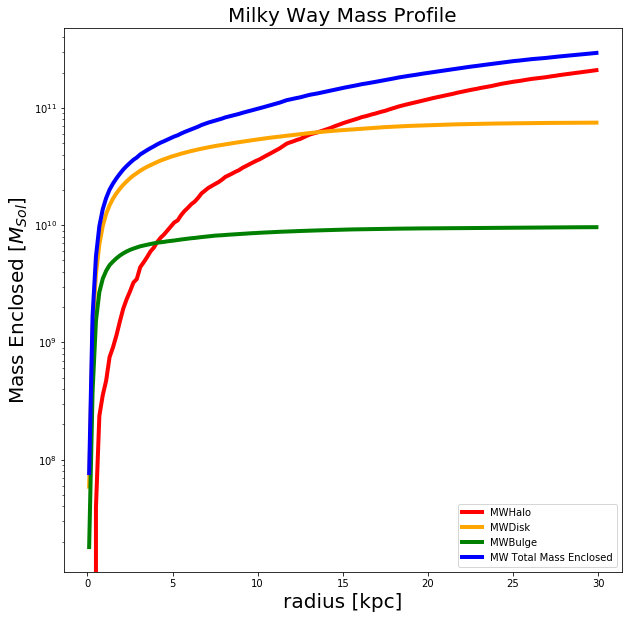

In [32]:
#now we are going to plot the mass enclosed vs radius for the milky way
R = np.arange(0.1,30,0.2)*u.kpc

#now we are going to set the size of the plot
fig = plt.figure(figsize=(10,10))

#this creates a subplot
ax = plt.subplot(111)

#now we will plot the mass profile, with radius on the x axis and mass enclosed on the y axis. The y axis will be in log
ax.semilogy(R,mw.MassEnclosed(1,R),color = 'red',linewidth = 4, label = 'MWHalo')
ax.semilogy(R,mw.MassEnclosed(2,R),color = 'orange',linewidth = 4,label = 'MWDisk')
ax.semilogy(R,mw.MassEnclosed(3,R),color = 'green',linewidth = 4,label = 'MWBulge')
ax.semilogy(R,mw.MassEnclosedTotal(R),color = 'blue',linewidth = 4,label = 'MW Total Mass Enclosed')

#now we need to label the axes
plt.xlabel('radius [kpc]',fontsize = 20)
plt.ylabel('Mass Enclosed [$M_{Sol}$]',fontsize = 20)
plt.title('Milky Way Mass Profile',fontsize = 20)

#now we add a legend
legend = ax.legend(loc='lower right')

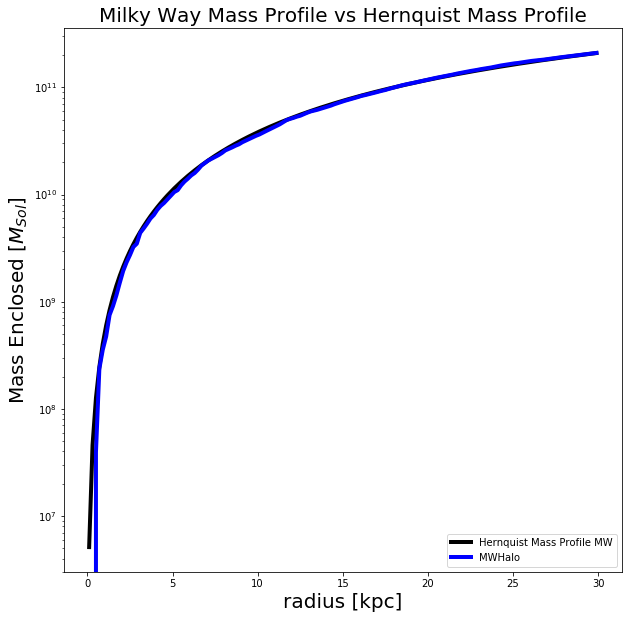

In [33]:
#now we plot the Hernquist Mass Profile and compare to the profile we produced above
R = np.arange(0.1,30,0.2)*u.kpc
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

#plotting the Hernquist mass profile
ax.semilogy(R,mw.HernquistM(R,HaloMass = 1.975,a=62*u.kpc),color = 'black',linewidth = 4, label = 'Hernquist Mass Profile MW')
ax.semilogy(R,mw.MassEnclosed(1,R),color = 'blue',linewidth = 4, label = 'MWHalo')

#labels
plt.xlabel('radius [kpc]',fontsize = 20)
plt.ylabel('Mass Enclosed [$M_{Sol}$]',fontsize = 20)
plt.title('Milky Way Mass Profile vs Hernquist Mass Profile',fontsize = 20)
legend = ax.legend(loc='lower right')

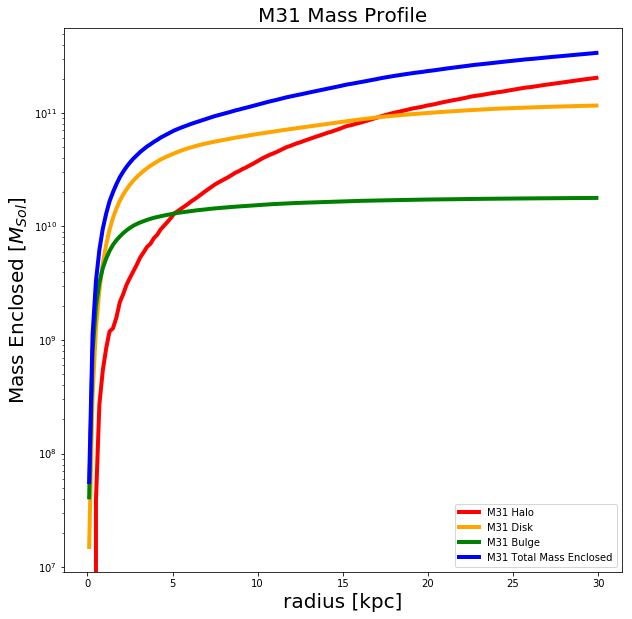

In [37]:
#now we do the same for M31 and M33
R = np.arange(0.1,30,0.2)*u.kpc

#now we are going to set the size of the plot
fig = plt.figure(figsize=(10,10))

#this creates a subplot
ax = plt.subplot(111)

#now we will plot the mass profile, with radius on the x axis and mass enclosed on the y axis. The y axis will be in log
ax.semilogy(R,m31.MassEnclosed(1,R),color = 'red',linewidth = 4, label = 'M31 Halo')
ax.semilogy(R,m31.MassEnclosed(2,R),color = 'orange',linewidth = 4,label = 'M31 Disk')
ax.semilogy(R,m31.MassEnclosed(3,R),color = 'green',linewidth = 4,label = 'M31 Bulge')
ax.semilogy(R,m31.MassEnclosedTotal(R),color = 'blue',linewidth = 4,label = 'M31 Total Mass Enclosed')

#now we need to label the axes
plt.xlabel('radius [kpc]',fontsize = 20)
plt.ylabel('Mass Enclosed [$M_{Sol}$]',fontsize = 20)
plt.title('M31 Mass Profile',fontsize = 20)

#now we add a legend
legend = ax.legend(loc='lower right')

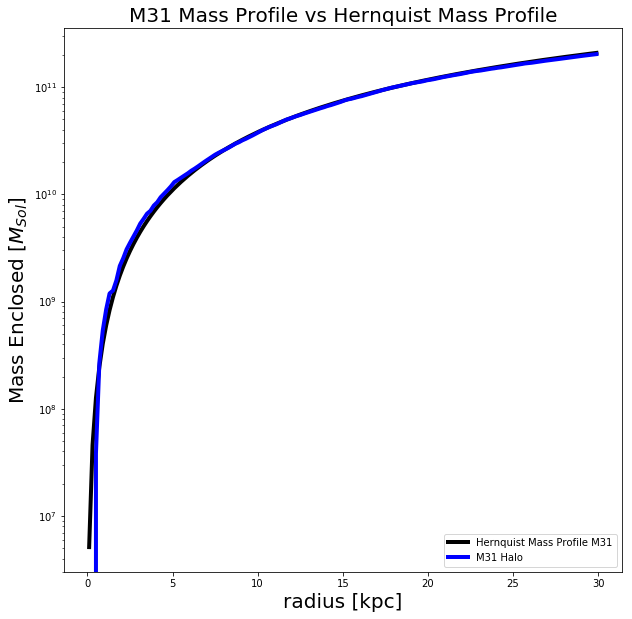

In [38]:
#now we plot the Hernquist Mass Profile and compare to the profile we produced above
R = np.arange(0.1,30,0.2)*u.kpc
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

#plotting the Hernquist mass profile
ax.semilogy(R,m31.HernquistM(R,HaloMass = 1.921,a=62*u.kpc),color = 'black',linewidth = 4, label = 'Hernquist Mass Profile M31')
ax.semilogy(R,m31.MassEnclosed(1,R),color = 'blue',linewidth = 4, label = 'M31 Halo')

#labels
plt.xlabel('radius [kpc]',fontsize = 20)
plt.ylabel('Mass Enclosed [$M_{Sol}$]',fontsize = 20)
plt.title('M31 Mass Profile vs Hernquist Mass Profile',fontsize = 20)
legend = ax.legend(loc='lower right')

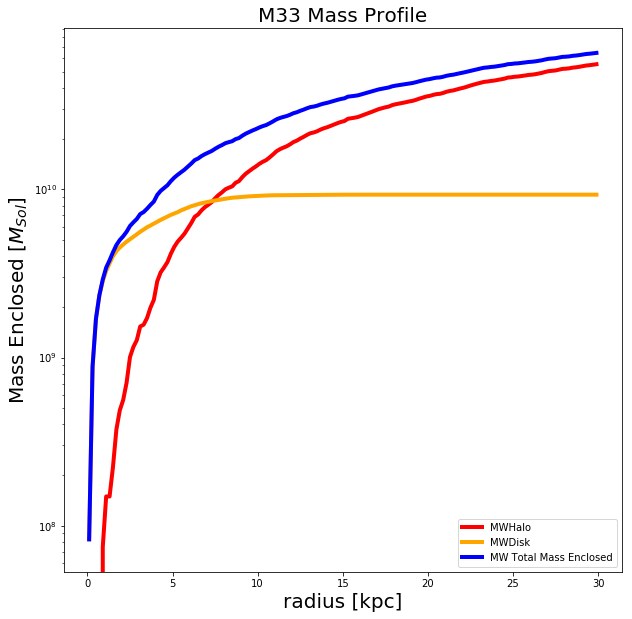

In [39]:
R = np.arange(0.1,30,0.2)*u.kpc

#now we are going to set the size of the plot
fig = plt.figure(figsize=(10,10))

#this creates a subplot
ax = plt.subplot(111)

#now we will plot the mass profile, with radius on the x axis and mass enclosed on the y axis. The y axis will be in log
ax.semilogy(R,m33.MassEnclosed(1,R),color = 'red',linewidth = 4, label = 'MWHalo')
ax.semilogy(R,m33.MassEnclosed(2,R),color = 'orange',linewidth = 4,label = 'MWDisk')
ax.semilogy(R,m33.MassEnclosedTotal(R),color = 'blue',linewidth = 4,label = 'MW Total Mass Enclosed')

#now we need to label the axes
plt.xlabel('radius [kpc]',fontsize = 20)
plt.ylabel('Mass Enclosed [$M_{Sol}$]',fontsize = 20)
plt.title('M33 Mass Profile',fontsize = 20)

#now we add a legend
legend = ax.legend(loc='lower right')

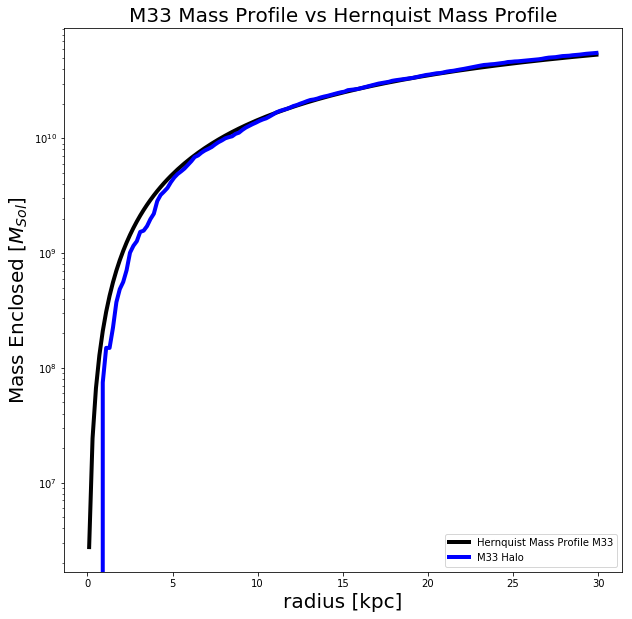

In [75]:
#now we plot the Hernquist Mass Profile and compare to the profile we produced above
R = np.arange(0.1,30,0.2)*u.kpc
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

#plotting the Hernquist mass profile
ax.semilogy(R,m33.HernquistM(R,HaloMass = 0.187,a=26*u.kpc),color = 'black',linewidth = 4, label = 'Hernquist Mass Profile M33')
ax.semilogy(R,m33.MassEnclosed(1,R),color = 'blue',linewidth = 4, label = 'M33 Halo')

#labels
plt.xlabel('radius [kpc]',fontsize = 20)
plt.ylabel('Mass Enclosed [$M_{Sol}$]',fontsize = 20)
plt.title('M33 Mass Profile vs Hernquist Mass Profile',fontsize = 20)
legend = ax.legend(loc='lower right')

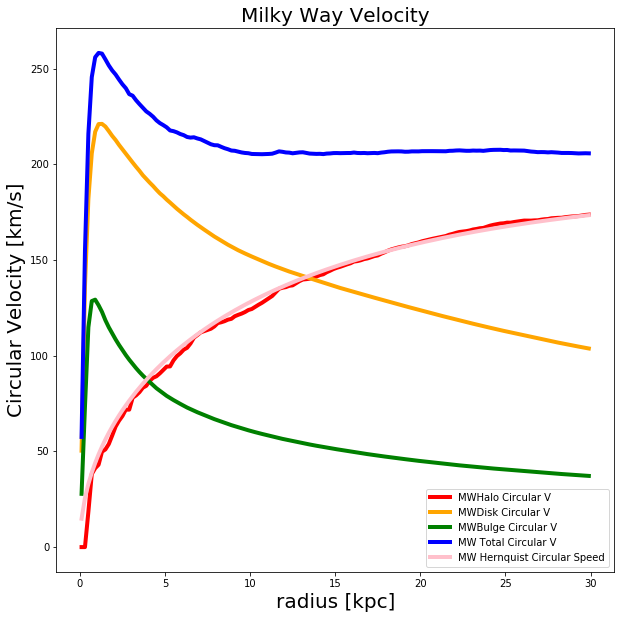

In [62]:
#now we plot the circular velocity function vs radius for the 3 galaxies
#starting with the MW
R = np.arange(0.1,30,0.2)*u.kpc

#now we are going to set the size of the plot
fig = plt.figure(figsize=(10,10))

#this creates a subplot
ax = plt.subplot(111)

#now we are plotting the radius on the x axis and the circular velocity on the y axis
ax.plot(R,mw.CircularVelocity(1,R),color="red",linewidth=4,label='MWHalo Circular V')
ax.plot(R,mw.CircularVelocity(2,R),color="orange",linewidth=4,label='MWDisk Circular V')
ax.plot(R,mw.CircularVelocity(3,R),color="green",linewidth=4,label='MWBulge Circular V')
ax.plot(R,mw.CircularVelocityTotal(R),color="blue",linewidth=4,label='MW Total Circular V')
ax.plot(R,mw.HernquistVCirc(R,HaloMass=1.975,a=62*u.kpc),color="pink",linewidth=4,label='MW Hernquist Circular Speed')

#labels
plt.xlabel('radius [kpc]',fontsize = 20)
plt.ylabel('Circular Velocity [km/s]',fontsize = 20)
plt.title('Milky Way Velocity',fontsize = 20)
legend = ax.legend(loc='lower right')

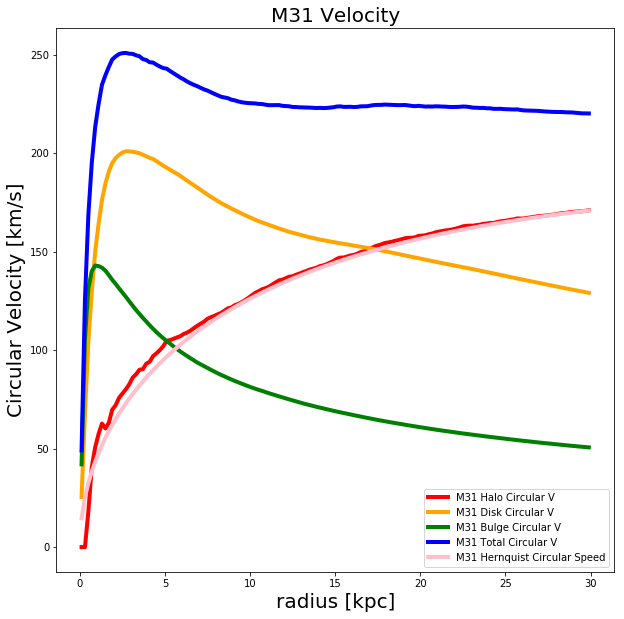

In [63]:
#now we plot the circular velocity function vs radius for the 3 galaxies
#starting with the MW
R = np.arange(0.1,30,0.2)*u.kpc

#now we are going to set the size of the plot
fig = plt.figure(figsize=(10,10))

#this creates a subplot
ax = plt.subplot(111)

#now we are plotting the radius on the x axis and the circular velocity on the y axis
ax.plot(R,m31.CircularVelocity(1,R),color="red",linewidth=4,label='M31 Halo Circular V')
ax.plot(R,m31.CircularVelocity(2,R),color="orange",linewidth=4,label='M31 Disk Circular V')
ax.plot(R,m31.CircularVelocity(3,R),color="green",linewidth=4,label='M31 Bulge Circular V')
ax.plot(R,m31.CircularVelocityTotal(R),color="blue",linewidth=4,label='M31 Total Circular V')
ax.plot(R,m31.HernquistVCirc(R,HaloMass = 1.921,a=62*u.kpc),color="pink",linewidth=4,label='M31 Hernquist Circular Speed')

#labels
plt.xlabel('radius [kpc]',fontsize = 20)
plt.ylabel('Circular Velocity [km/s]',fontsize = 20)
plt.title('M31 Velocity',fontsize = 20)
legend = ax.legend(loc='lower right')

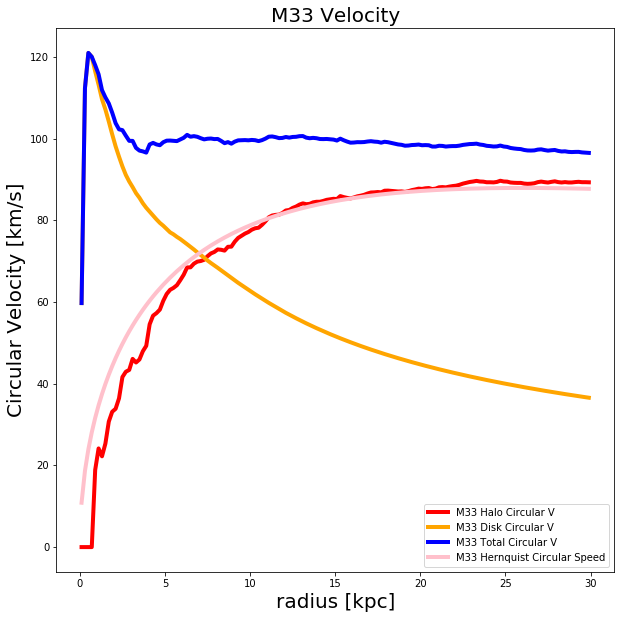

In [76]:
#now we plot the circular velocity function vs radius for the 3 galaxies
#starting with the MW
R = np.arange(0.1,30,0.2)*u.kpc

#now we are going to set the size of the plot
fig = plt.figure(figsize=(10,10))

#this creates a subplot
ax = plt.subplot(111)

#now we are plotting the radius on the x axis and the circular velocity on the y axis
ax.plot(R,m33.CircularVelocity(1,R),color="red",linewidth=4,label='M33 Halo Circular V')
ax.plot(R,m33.CircularVelocity(2,R),color="orange",linewidth=4,label='M33 Disk Circular V')
ax.plot(R,m33.CircularVelocityTotal(R),color="blue",linewidth=4,label='M33 Total Circular V')
ax.plot(R,m33.HernquistVCirc(R,HaloMass=0.187,a=26*u.kpc),color="pink",linewidth=4,label='M33 Hernquist Circular Speed')

#labels
plt.xlabel('radius [kpc]',fontsize = 20)
plt.ylabel('Circular Velocity [km/s]',fontsize = 20)
plt.title('M33 Velocity',fontsize = 20)
legend = ax.legend(loc='lower right')